# Importando bibliotecas necessárias
Nesta célula, importaremos as bibliotecas necessárias para criar nosso modelo de machine learning.

- `pandas` para manipulação de dados.
- `sklearn` para implementar o modelo de Naive Bayes e avaliar seu desempenho.
- `train_test_split` para dividir nosso conjunto de dados em conjuntos de treinamento e teste.
- `accuracy_score`, `precision_score`, `recall_score`, `f1_score` e `confusion_matrix` para avaliar o desempenho do modelo.
- `matplotlib` e `seaborn` para visualização dos resultados.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Carregando os Dados 
df = pd.read_csv(r"C:\Users\maype\OneDrive\Área de Trabalho\projects\projeto-aprendizado-de-maquina\Data\base_balanceada.csv")


Primeiras linhas dos dados:

Informações sobre os dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71530 entries, 0 to 71529
Data columns (total 63 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       71530 non-null  int64  
 1   Sexo                             71530 non-null  float64
 2   Apoio_Familiar                   71530 non-null  float64
 3   Apoio_de_Amigos                  71530 non-null  float64
 4   Tipo_de_Trabalho                 71530 non-null  float64
 5   Curso_Mais_Elevado               71530 non-null  float64
 6   A005010                          71530 non-null  float64
 7   Estado_de_Saude                  71530 non-null  float64
 8   Pratica_Exercicio                71530 non-null  float64
 9   Exercicio_Mais_Frequente         71530 non-null  float64
 10  Ultima_Consulta_Medica           71530 non-null  float64
 11  Procura_Atendimento_Sau

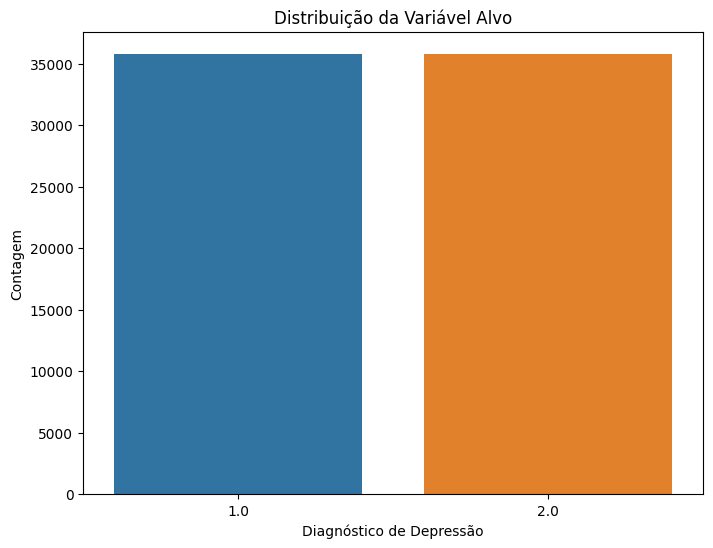

In [4]:
# Visualizando as primeiras linhas dos dados
print("Primeiras linhas dos dados:")
df.head()

# Verificando informações sobre os tipos de dados e valores ausentes
print("\nInformações sobre os dados:")
df.info()

# Verificando valores ausentes
print("\nValores ausentes por coluna:")
df.isnull().sum()

# Explorando a distribuição da variável alvo
print("\nDistribuição da variável alvo:")
df['Diagnostico_Depressao'].value_counts()

# Visualizando a distribuição da variável alvo
plt.figure(figsize=(8, 6))
sns.countplot(x='Diagnostico_Depressao', data=df)
plt.title('Distribuição da Variável Alvo')
plt.xlabel('Diagnóstico de Depressão')
plt.ylabel('Contagem')
plt.show()

In [6]:
# Dividindo os dados em conjuntos de treinamento e teste
X = df.drop('Diagnostico_Depressao', axis=1)  # Features
y = df['Diagnostico_Depressao']  # Variável alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo Naive Bayes
Agora é hora de treinar nosso modelo de Naive Bayes.

- Criaremos uma instância do modelo `GaussianNB`.
- Ajustaremos o modelo aos dados de treinamento usando o método `.fit()`.

In [7]:
# Criando uma instância do modelo Naive Bayes
naive_bayes_model = GaussianNB()

# Treinando o modelo com os dados de treinamento
naive_bayes_model.fit(X_train, y_train)

GaussianNB()

# Avaliação do modelo
Nesta etapa, avaliaremos o desempenho do nosso modelo de Naive Bayes.

- Faremos previsões nos dados de teste usando o método `.predict()`.
- Avaliaremos o modelo usando várias métricas de desempenho, incluindo acurácia, precisão, recall, pontuação F1 e matriz de confusão.

In [8]:
# Fazendo previsões nos dados de teste
y_pred = naive_bayes_model.predict(X_test)

# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Métricas de Desempenho:")
print(f"Acurácia: {accuracy}")
print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"Pontuação F1: {f1}")
print("\nMatriz de Confusão:")
print(conf_matrix)


Métricas de Desempenho:
Acurácia: 0.889347127079547
Precisão: 0.8811813186813187
Recall: 0.8993410907051731
Pontuação F1: 0.8901685977936585

Matriz de Confusão:
[[6415  718]
 [ 865 6308]]


# Interpretação dos resultados
Agora, vamos interpretar os resultados das métricas de desempenho e da matriz de confusão.

- Acurácia: Mede a proporção de previsões corretas do modelo.
- Precisão: Mede a proporção de verdadeiros positivos em relação ao total de positivos previstos pelo modelo.
- Recall: Mede a proporção de verdadeiros positivos em relação ao total de positivos reais no conjunto de dados.
- Pontuação F1: É a média harmônica da precisão e do recall. É uma métrica que leva em consideração tanto a precisão quanto o recall.
- Matriz de Confusão: Mostra a distribuição das previsões do modelo em relação aos verdadeiros rótulos. Ela contém informações sobre os verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos.

C:\Users\maype\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


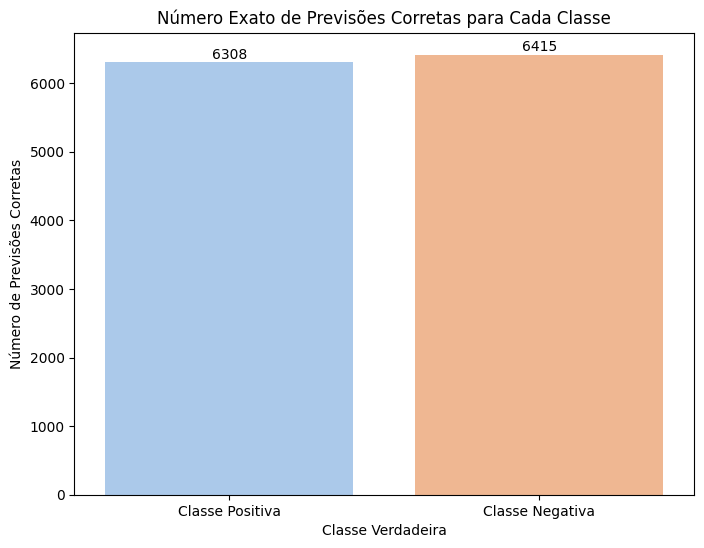

In [12]:
# Plotando o número exato de previsões corretas para cada classe
plt.figure(figsize=(8, 6))
sns.barplot(x=['Classe Positiva', 'Classe Negativa'], y=[TP, TN], palette='pastel')
plt.title('Número Exato de Previsões Corretas para Cada Classe')
plt.xlabel('Classe Verdadeira')
plt.ylabel('Número de Previsões Corretas')
for i, v in enumerate([TP, TN]):
    plt.text(i, v + 5, str(v), ha='center', va='bottom')
plt.show()
